In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os 
import pickle
import pandas as pd
import seaborn as sns

pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

In [7]:

scores = []
basins = []
basin_model_dict= {} 
pbar = os.listdir('../data/processed/pickles/basins/')
for i in os.listdir('../data/processed/pickles/basins/'):
    if i in ['.DS_Store', '.ipynb_checkpoints']: 
        continue 
    basins.append(i)
    #pbar.set_description(f'Testing Classifier for: {i.upper()}')
    x_train = pickle.load(open(f'../data/processed/pickles/basins/{i}/x_train.p', 'rb'))
    x_test = pickle.load(open(f'../data/processed/pickles/basins/{i}/x_test.p', 'rb'))
    y_train = pickle.load(open(f'../data/processed/pickles/basins/{i}/y_train.p', 'rb'))
    y_test = pickle.load(open(f'../data/processed/pickles/basins/{i}/y_test.p', 'rb'))
    
    x_train.drop('basin', axis =1, inplace = True)
    x_test.drop('basin', axis =1, inplace = True)
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    rf = RandomForestClassifier()
   
    
#     plot_confusion_matrix(rf, x_test, y_test)
    param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': [100, 250, 300, 350, 450],
    'min_samples_split': [5, 8,10, 15],
    'min_samples_leaf': [3, 5, 10, 15],
    'max_features': ['sqrt', 'log2'],
}
    standard = StandardScaler()
    x_train[['amount_tsh', 'gps_height', 'population', 'time_passed', 'longitude', 'latitude']] = standard.fit_transform(
                                 x_train[['amount_tsh', 'gps_height', 'population', 'time_passed', 'longitude', 'latitude']]
    )
    x_test[['amount_tsh', 'gps_height', 'population', 'time_passed', 'longitude', 'latitude']] = standard.fit_transform(
        x_test[['amount_tsh', 'gps_height', 'population', 'time_passed', 'longitude', 'latitude']]
    )
    cv = RepeatedStratifiedKFold(n_splits = 7, n_repeats = 5)
    gs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = cv, n_jobs = -1, verbose = 2, 
                            n_iter = 75)

    gs.fit(x_train, y_train)
    pickle.dump(gs, open(f'../models/basins/{i}_GridSearch.p', 'wb'))
    basin_dict = dict(model = gs, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test) 
    basin_model_dict[i] = basin_dict
    

pickle.dump(basin_model_dict, open(f'../models/TunedBasinModels.p', 'wb'))
    

Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  2.2min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  1.5min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  2.5min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  2.4min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:   56.3s finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  1.4min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  1.6min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  2.2min finished


Fitting 35 folds for each of 75 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed:  1.6min finished


In [8]:
# fig, ax = plt.subplots(1, len(basin_model_dict.keys()))
for idx, i in enumerate(basin_model_dict.keys()): 
    print(i)
    basin_dict = basin_model_dict[i]
    model = basin_dict['model']
    print(model.best_estimator_)

int
RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5)
nya
RandomForestClassifier(criterion='entropy', max_depth=300, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5)
pang
RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5)
ruf
RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5)
rukwa
RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5)
ruv
RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=8)
tang
RandomForestClassifier(criterion='entropy', max_depth=300, max_features='sqrt',
                       m

In [6]:
orig_dict = {'Lake Nyasa' : 'nya', 'Lake Victoria' : 'vic', 'Pangani' : 'pang', 'Ruvuma / Southern Coast' : 'ruv', \
                 'Internal' : 'int', 'Lake Tanganyika' : 'tang', 'Wami / Ruvu' : 'wami', 'Rufiji' : 'ruf',
             'Lake Rukwa' : 'rukwa'}


new_dict = {y:i for i,y in orig_dict.items()}
# new_dict

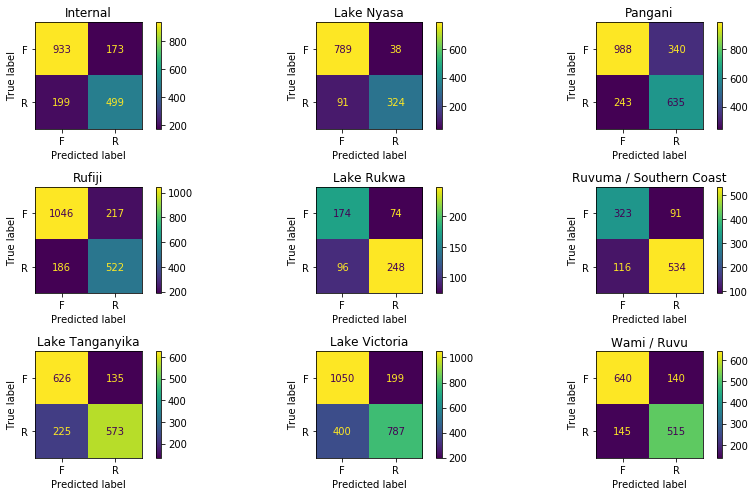

In [8]:
basin_model_dict = pickle.load(open(f'../models/TunedBasinModels.p', 'rb'))


fig, ax = plt.subplots(3, 3, figsize = (12,7))
cm_dict = {}
for idx, i in enumerate(basin_model_dict.keys()): 
    basin_dict = basin_model_dict[i]
    model =basin_dict['model'].best_estimator_
    x_test = basin_dict['x_test']
    y_test = basin_dict['y_test']
    plot_confusion_matrix(model, x_test, y_test, 
                          display_labels = ['F', 'R'], ax = ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(f'{new_dict[i]}')
    cm_dict[i] = confusion_matrix(y_test, model.predict(x_test))
    
plt.tight_layout()
plt.savefig(f'figures/BASINS_confusion_matrix.png')
pickle.dump(cm_dict, open(f'../models/Basins/BasinCMDict.p', 'wb'))

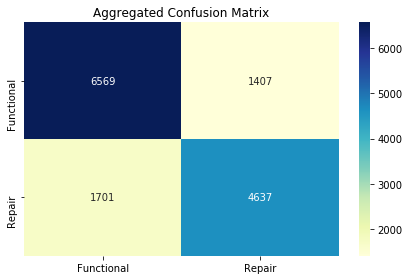

In [27]:
# aggregate confusion matrices 
tn = sum([i[0][0] for y,i in cm_dict.items()])
fp = sum([i[0][1] for y,i in cm_dict.items()])
fn = sum([i[1][0] for y,i in cm_dict.items()])
tp = sum([i[1][1] for y,i in cm_dict.items()])

cm_new = [[tn, fp],[fn, tp]]
sns.heatmap(cm_new, annot = True, fmt = 'g', cmap = 'YlGnBu', xticklabels = ['Functional', 'Repair'], yticklabels = ['Functional', 'Repair'])
plt.title('Aggregated Confusion Matrix')
plt.tight_layout() 
plt.savefig('figures/AggregatedCM.png')

In [16]:
basin_model_dict = pickle.load(open(f'../models/TunedBasinModels.p', 'rb'))
pbar = tqdm(basin_model_dict.keys())
final_results = {} 
for bas in pbar: 
    pbar.set_description(f'KFold: {bas}')
    model = basin_model_dict[bas]['model'].best_estimator_
    x_train = basin_model_dict[bas]['x_train']
    x_test = basin_model_dict[bas]['x_test']
    X = x_train.append(x_test, ignore_index = True)
    
    y_train = pd.DataFrame(basin_model_dict[bas]['y_train'], columns = ['target'])
    y_test = pd.DataFrame(basin_model_dict[bas]['y_test'], columns = ['target'])
    y = y_train.append(y_test, ignore_index = True)
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
    scores = cross_val_score(model, X, y.target.values, scoring = 'accuracy', cv = cv, n_jobs = -1, 
                             error_score = 'raise')
    final_results[bas]=  scores
    


KFold: wami: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:07<00:00,  7.52s/it]


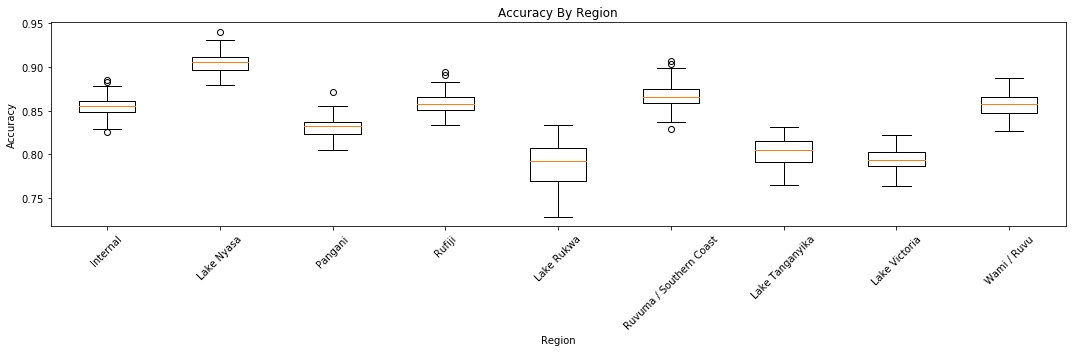

In [17]:
plt.figure(figsize = (15,5))
names = [new_dict[i] for i in final_results.keys()]
results = [i[1] for i in final_results.items()]
plt.boxplot(results, labels = names)
plt.title('Accuracy By Region')
plt.xlabel('Region')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('figures/ByRegionKFold.png')
plt.show()